In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import Conv2D

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
import matplotlib.pyplot as plt

In [7]:
classifier = Sequential()

In [8]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [9]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
classifier.add(Flatten())

In [13]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [14]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [15]:
#from keras.optimizers import SGD
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mangoes/Train Data',
                                                 target_size = (64, 64),class_mode = 'binary')

Found 254 images belonging to 2 classes.


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mangoes/Test Data',
                                            target_size = (64, 64),class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [22]:
classifier.fit(training_set,
epochs = 10,
batch_size=32
)

Epoch 1/10
8/8 [==============================] - 44s 5s/step - loss: 0.6691 - accuracy: 0.6890
Epoch 2/10
8/8 [==============================] - 4s 457ms/step - loss: 0.4600 - accuracy: 0.7795
Epoch 3/10
8/8 [==============================] - 3s 298ms/step - loss: 0.3029 - accuracy: 0.8780
Epoch 4/10
8/8 [==============================] - 2s 294ms/step - loss: 0.2398 - accuracy: 0.8937
Epoch 5/10
8/8 [==============================] - 3s 312ms/step - loss: 0.2398 - accuracy: 0.9134
Epoch 6/10
8/8 [==============================] - 3s 328ms/step - loss: 0.2102 - accuracy: 0.9213
Epoch 7/10
8/8 [==============================] - 4s 442ms/step - loss: 0.1954 - accuracy: 0.9213
Epoch 8/10
8/8 [==============================] - 3s 318ms/step - loss: 0.1743 - accuracy: 0.9331
Epoch 9/10
8/8 [==============================] - 3s 314ms/step - loss: 0.1670 - accuracy: 0.9449
Epoch 10/10
8/8 [==============================] - 3s 310ms/step - loss: 0.1672 - accuracy: 0.9370


In [23]:
print("Result:",classifier.predict(test_set))
#A=classifier.predict(test_set)
loss, accuracy = classifier.evaluate(test_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 [==============================] - 19s 18s/step
Result: [[0.1353278 ]
 [0.99987316]
 [0.20796126]
 [0.9999802 ]
 [0.5349872 ]
 [0.11291913]
 [0.05328593]
 [0.05222513]
 [0.10065094]
 [0.99999243]
 [0.99992234]
 [0.08363952]
 [0.09882252]
 [0.99968505]
 [0.99995494]
 [0.9999997 ]
 [0.9931946 ]
 [0.03825767]
 [0.99790245]
 [0.05328593]
 [0.9995682 ]
 [0.99999905]
 [0.98741037]
 [0.55453146]
 [0.99960154]
 [0.32658204]
 [0.9998949 ]
 [0.10258668]
 [0.09341649]
 [0.06274321]
 [0.10007743]
 [0.09800147]
 [0.9993128 ]
 [0.986802  ]
 [0.9994459 ]
 [0.9975529 ]
 [0.99993384]
 [0.06865939]
 [0.99999017]
 [0.8573432 ]
 [0.09229452]
 [0.99992514]
 [0.08277625]
 [0.9999888 ]
 [0.07158849]
 [0.999997  ]
 [0.07551561]
 [0.9999956 ]
 [0.08634612]
 [0.9957962 ]
 [0.07237019]
 [0.99966574]
 [0.09055664]
 [0.9990006 ]
 [0.15245788]
 [0.9977435 ]
 [0.10262274]
 [0.999981  ]
 [0.11290069]
 [0.9993633 ]]
2/2 [==============================] - 1s 183ms/step - loss: 0.2453 - accuracy: 0.9500
Loss: 0.2453

In [24]:
class_indices = training_set.class_indices
print("Class indices:", class_indices)


Class indices: {'Riped Mangoes': 0, 'Unriped Mangoes': 1}


In [25]:
class_indices = test_set.class_indices
print("Class indices:", class_indices)


Class indices: {'Riped Mangoes': 0, 'Unriped Mangoes': 1}


In [26]:
import numpy as np

In [27]:
from keras.preprocessing import image

In [28]:
#img = image.load_img(val_img_file, target_size=(224, 224))
#print(type(img))

1/1 [==============================] - 0s 38ms/step
------------------------------------------------------------
Mangoes are good and not expected to ripe soon!
------------------------------------------------------------


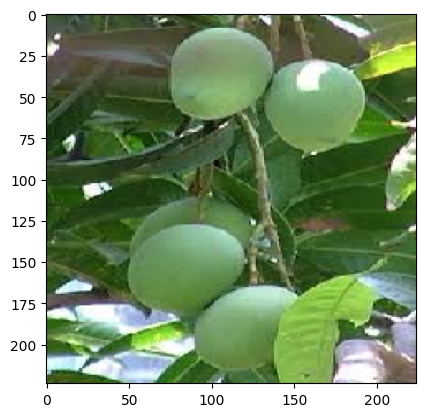

In [31]:
val_img_file = '/content/drive/MyDrive/Mangoes/Test Data/Unriped Mangoes/images (52).jpg'
#test_image = image.load_img(val_img_file, target_size = (64, 64))
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
#result = classifier.predict(test_image)
test_image = image.load_img(val_img_file, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = classifier.predict(test_image)
#print(result)
print(60*'-')
if (result[0][0]<=0.5):
  print("Mangoes are expected to ripe soon!")
else:
  print("Mangoes are good and not expected to ripe soon!")
print(60*'-')
"""class_dict = {0:'stage1', 1 : 'stage2'}
days_dict = {0:'0-5', 1 : '5-10'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices"""
#print(60*'-')
#print('Mangoes are currently in {} and expected to ripe in {}.'.format(class_dict[np.argmax(result)],days_dict[arg_max]))
arg_max = np.argmax(result)
#print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)


In [ ]:
"""class_dict = {0:'stage1', 1 : 'stage2'}
days_dict = {0:'0-5', 1 : '5-10'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices
print(60*'-')
print('Mangoes are currently in {} and expected to ripe in {}.'.format(class_dict[np.argmax(result)],days_dict[arg_max]))
arg_max = np.argmax(result)
print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)"""